In [1]:
import pandas as pd
import numpy as np

In [7]:
ipdf = pd.read_csv('tvmarketing.csv')
cols = ipdf.columns
print('\nColumns\n',cols)
print('\nShape\n',ipdf.shape)
print('\nTop 5 data\n',ipdf.head())


Columns
 Index(['TV', 'Sales'], dtype='object')

Shape
 (200, 2)

Top 5 data
       TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [10]:
print('\nInfo\n')
print(ipdf.info())
print('\nSummary Stats\n',ipdf.describe())


Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB
None

Summary Stats
                TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


In [12]:
#visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

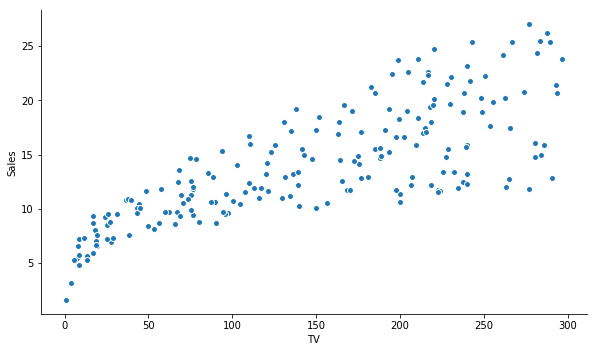

In [19]:
#help(sns.pairplot)
sns.pairplot(ipdf,x_vars=['TV'],y_vars='Sales', size=5,aspect=1.7, kind='scatter')
plt.show()

In [76]:
'''
General Linera Regression
y = b0 + b1*x1 + b2*x1 ... +bn*xn + e where, 
y : target variable
xi: independent variable
b0: intercept
bi: coefficient for ith feature
e : error/bias due to noise
'''
from sklearn.cross_validation import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.metrics   import mean_squared_error, r2_score

In [58]:
x = ipdf['TV']
y = ipdf['Sales']

x_test, x_train, y_test, y_train = train_test_split(x,y,train_size=0.7,random_state=0)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(140,)
(60,)
(140,)
(60,)


In [59]:
#Reshape only the target data
x_train=x_train[:,np.newaxis]
x_test=x_test[:,np.newaxis]
#y_train=y_train[:,np.newaxis]
#y_test=y_test[:,np.newaxis]

In [60]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [61]:
#create the liner model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
#Get the regression coefficients
print('\nIntercept \t',model.intercept_)
print('\nCoefficients \t',model.coef_)


Intercept 	 6.528770162665506

Coefficients 	 [0.05113491]


In [63]:
#predict the values
y_pred = model.predict(x_train)

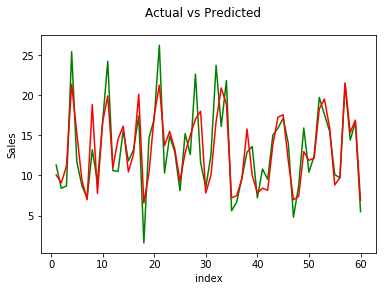

In [74]:
#plot the actual vs predicted data
rang = [i for i in range(1,x_train.shape[0]+1)]
zeros = [0 for i in range(1,x_train.shape[0]+1)]

fig = plt.figure()
plt.plot(rang,y_train,color='g')
plt.plot(rang,y_pred,color='r')
fig.suptitle('Actual vs Predicted')
plt.xlabel('index')
plt.ylabel('Sales')
plt.show()

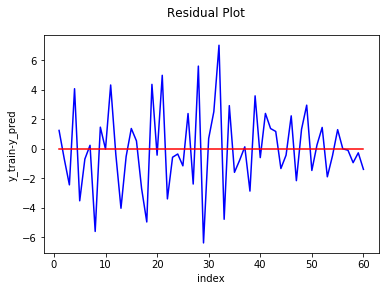

In [75]:
#plotting the residual
fig = plt.figure()
plt.plot(rang,y_train-y_pred,color='b')
plt.plot(rang,zeros,color='r')
fig.suptitle('Residual Plot')
plt.xlabel('index')
plt.ylabel('y_train-y_pred')
plt.show()

In [80]:
#compute the model performance matrices
mse = mean_squared_error(y_train,y_pred)
rsquare = r2_score(y_train,y_pred)

print('MSE for Train set\n',mse)
print('R2 for Train set\n',rsquare)

MSE for Train set
 7.273482790968672
R2 for Train set
 0.733804208321302


In [81]:
#Model testing
y_test_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_test_pred)
rsquare = r2_score(y_test,y_test_pred)

print('MSE for Test set\n',mse)
print('R2 for Test set\n',rsquare)

MSE for Test set
 12.037436531966305
R2 for Test set
 0.5476962186017076
